In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test peak fit

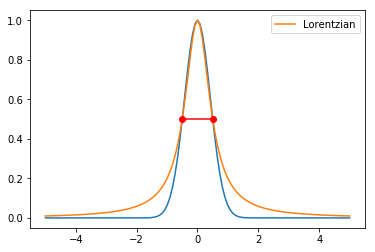

In [24]:
x = np.linspace(-5, 5, 123)

gauss = Gauss()
y_g = gauss(x, 0, 1, 1)
plt.plot(x, y_g);

lorentzian = Lorentzian()
y_l = lorentzian(x, 0, 1, 1)
plt.plot(x, y_l, label=lorentzian.name);

plt.plot([-.5, .5], [.5, .5], '-or'); # test FWHM
plt.legend();

[{'x0': -0.0018737958744604627,
  'fwhm': 0.9889848618329397,
  'amplitude': 0.9966169056061741},
 {'slope': 0.000596025957688191, 'intercept': 0.05433204181150222}]

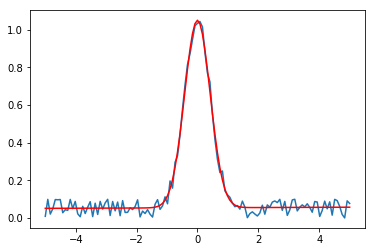

In [14]:
# Fit
results, fit = peakfit(x, y)

plt.plot(x, y);
plt.plot(x, fit(x), 'r-');
results

In [ ]:
s = Sum(Sum(Gauss(), Gauss()), Linear())

s.estimate_param(x, y)

[autoreload of peakfit failed: Traceback (most recent call last):
  File "/home/etiennenavarro/notebooks/py3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/etiennenavarro/notebooks/py3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/etiennenavarro/notebooks/peakfit/peakfit.py", line 130, in <module>
    x = np.linspace(-5, 5, 123)
NameError: name 'np' is not defined
]


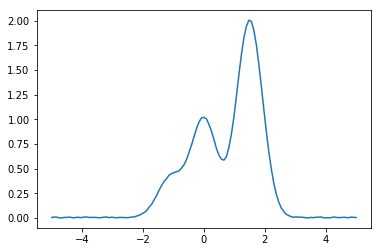

In [4]:
x = np.linspace(-5, 5, 123)

gauss = Gauss()
y = gauss(x, 0, 1, 1)
y += .01 *np.random.rand(*y.shape)
y += gauss(x, 1.5, 1, 2)
y += gauss(x, -1.1, 1, .4)

plt.plot(x, y);

In [ ]:

s = Sum(Sum(Gauss(.01), Gauss(-.1)), Gauss(1))

s = Sum(Gauss(), Gauss(.1))

minimizer, fit = peakfit(x, y, s)

minimizer

plt.plot(x, y);
plt.plot(x, fit(x))
plt.plot(x, Gauss()(x, **minimizer[0]))
plt.plot(x, Gauss()(x, **minimizer[1]))

s = Sum(Gauss(1), Gauss(13))

Gauss().param_name

ss = Sum(s, Gauss(2))

ss.estimate_param(x, y)
